In [139]:
import csv
import os
import numpy as np
import pandas as pd
import scipy.io
import sys
from tkinter.filedialog import askopenfilename
from tkinter import *
from PIL import Image,ImageOps,ImageDraw
from random import randint
import matplotlib.pyplot as plt


In [310]:
seleccion_fichero = True
if seleccion_fichero:

    resul_file = "unassigned"

    def openFile():
        global resul_file
        resul_file = askopenfilename()
        root.destroy()

    if __name__ == '__main__':

        root = Tk()
        Button(root, text='File Open', command = openFile).pack(fill=X)
        mainloop()

        print ("Archivo seleccionado: ",resul_file)
        resul_name = os.path.split(resul_file)[-1]
else:
    resul_path = r"D:\MediaEval2016\Dades\resultados"
    resul_name = "run3_UNED_UV_ini_71_5primerasFlicker_v2.txt" #AQUI SE CAMBIA EL ARCHIVO DE EVALUACION

    resul_file = os.path.join(resul_path,resul_name)

Archivo seleccionado:  D:/MediaEval2016/Dades/resultados/RESULTADOS DEFINITVOS/Test/run3/run3_UNED_UV_ini_71_ClustersVisuales_20_LogisticRegression.txt


In [311]:
df_res = pd.read_csv(resul_file,sep=" ",header=None,names=["Query","Iter","Id_image","Rank Position","Probability","Run type"])

In [312]:
def get_topic_name(topic):
    if topic>=1 and topic<=70:
        DevSetTopics = scipy.io.loadmat('DevSetTopics.mat')
        DevSetTopics_list=[]
        for i in range(len(DevSetTopics["DevSetTopics"])):
            DevSetTopics_list.append([DevSetTopics["DevSetTopics"][i][0][0][0],DevSetTopics["DevSetTopics"][i][1][0]])
        return DevSetTopics_list[topic-1][1]
    else:
        TestSetTopics = scipy.io.loadmat('TestSetTopics.mat')
        TestSetTopics_list=[]
        for i in range(len(TestSetTopics["TestSetTopics"])):
            TestSetTopics_list.append([TestSetTopics["TestSetTopics"][i][0][0][0],TestSetTopics["TestSetTopics"][i][1][0]])
        return TestSetTopics_list[topic-71][1]

In [313]:
def open_clusters(topic):
    path = r"D:\MediaEval2016\Dades\images\gt\dGT"
    #Necesitamos el nombre del topic, no el número. Obtenemos los nombres a traves de otra función
    name = get_topic_name(topic)
    clusters_names = os.path.join(path,name + " dclusterGT.txt")
    clusters_ims = os.path.join(path,name + " dGT.txt")
    df_clusters_names = pd.read_csv(clusters_names,sep=",",header=None,names=["Cluster_id","Cluster_name"])
    df_clusters_ims = pd.read_csv(clusters_ims,sep=",",header=None,names=["Image_id","Cluster_id"])
    return df_clusters_names,df_clusters_ims

In [314]:
def generate_colours(num):
    color = []
    for i in range(num):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    return color

In [315]:
def get_rGT(topic):
    rGT_path = r"D:\MediaEval2016\Dades\images\gt\rGT"
    rGT_file = os.path.join(rGT_path,topic_2name(topic)+" rGT.txt")
    rGT = pd.read_csv(rGT_file,sep=",",header=None,names=["Id_Imagen","Relevant"])
    return rGT
def topic_2name(topic):
    names_path = r'C:\Users\alexc\OneDrive\Documentos\MATEMATICAS\TFG\codigoMediaEval2016\codigoMediaEval2016'
    Dev_Topics_names  = scipy.io.loadmat(os.path.join(names_path,"DevSetTopics.mat"))
    Test_Topics_names = scipy.io.loadmat(os.path.join(names_path,"TestSetTopics.mat"))
    Topics_names=[]
    for i in range(len(Dev_Topics_names["DevSetTopics"])):
        Topics_names.append([Dev_Topics_names["DevSetTopics"][i][0][0][0],Dev_Topics_names["DevSetTopics"][i][1][0]])
    for i in range(len(Test_Topics_names["TestSetTopics"])):
        Topics_names.append([Test_Topics_names["TestSetTopics"][i][0][0][0],Test_Topics_names["TestSetTopics"][i][1][0]])
        
    for i in range(len(Topics_names)):
        if Topics_names[i][0]==topic:
            topic_name = Topics_names[i][1]
            break
            
    return topic_name

In [316]:
def plot_ranking(df,topic,num):
    ids = np.array(df[df["Query"]==topic]["Id_image"])
    print(get_topic_name(topic))
    #Guardamos en dos dataframes la informacion relativa a los clusters (ids,nombres,imagenes incluidas...)
    clus_names,clus_ims = open_clusters(topic)
    colores = generate_colours(clus_names.shape[0])
    
    if num%5==0:
        image_folder = os.path.join(r'D:\MediaEval2016\Dades',"images","collection","topic"+str(topic))
        fig,ax = plt.subplots(3,5,figsize=(20,20))
        for i,ax in enumerate(ax.flat):
            #Es equivalennte a un if relevante==True, ya que si una imagen no es relevante da error
            try:
                clus_id = np.array(clus_ims[clus_ims["Image_id"]==ids[i]]["Cluster_id"])[0]
                clus_name = np.array(clus_names[clus_names["Cluster_id"]==clus_id]["Cluster_name"])[0]
                im = ImageOps.expand(Image.open(image_folder+"/"+str(ids[i])+".jpg"),border=20,fill=colores[clus_id])
                plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.05)
                ax.imshow(im)
                ax.set_axis_off()
                ax.set_title(clus_name, fontdict = {'fontsize' : 20})
            except:
                im = Image.open(image_folder+"/"+str(ids[i])+".jpg")
                width, height = im.size
                draw = ImageDraw.Draw(im)
                draw.line((0, 0, width, height), fill=(255, 0, 0), width=50)
                draw.line((width, 0, 0, height), fill=(255, 0, 0), width=50)
                ax.imshow(im)
                ax.set_axis_off()
    else:
        print("Solo se puede introducir un número múltiplo de 5 para mostrar las imágenes")

predator_and_prey


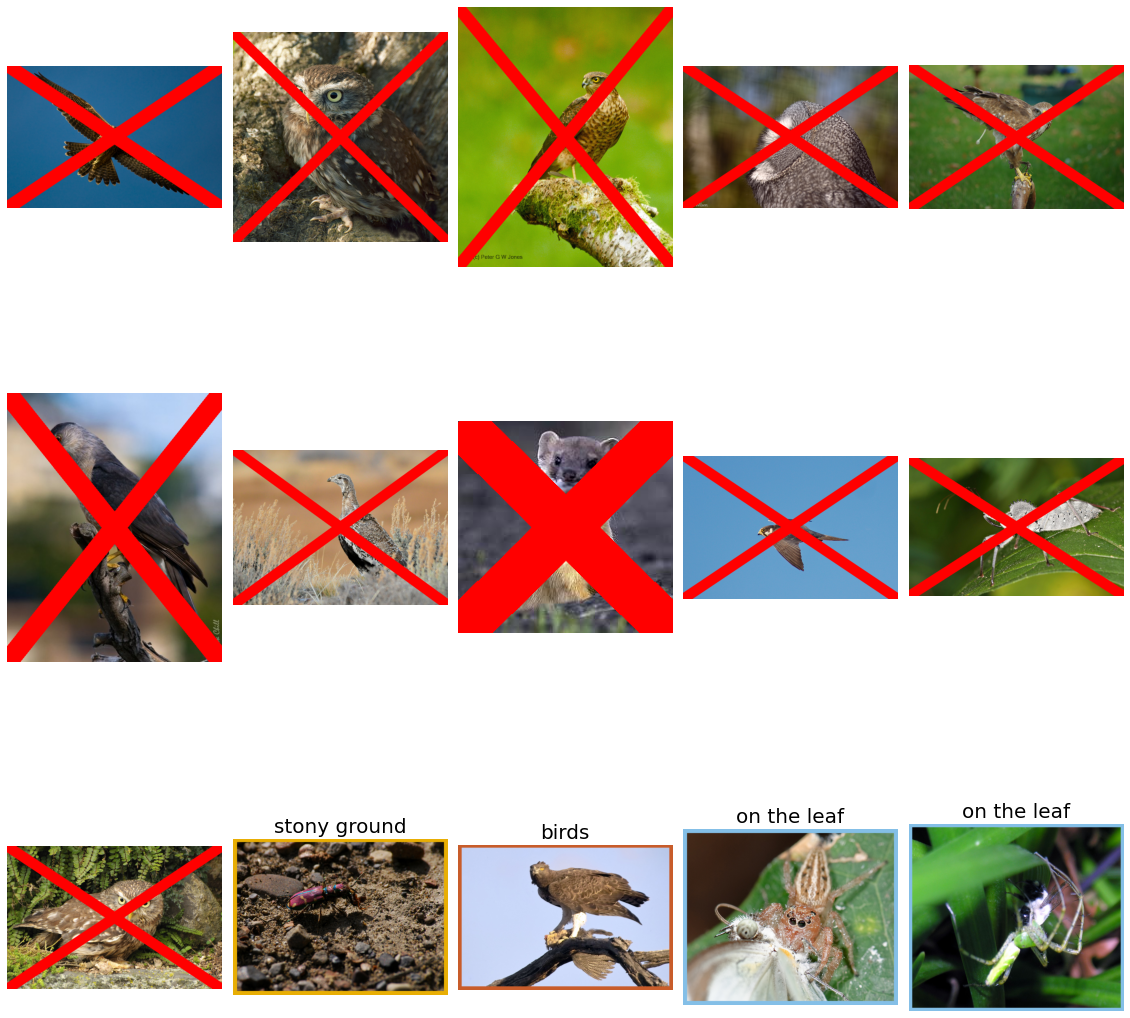

In [318]:
plot_ranking(df_res,117,20)

In [22]:
np.array(df_res[df_res["Query"]==71]["Id_image"]).shape

(50,)

In [52]:
imgs = get_rGT(75)[get_rGT(75)["Relevant"]==1]["Id_Imagen"]
imgs

0      10080813356
3      10106277834
4      10106334255
5      10141773254
6      10141784664
          ...     
294     9501733042
295     9511778975
296     9588494748
297     9601971605
299     9849459824
Name: Id_Imagen, Length: 100, dtype: int64

In [53]:
open_clusters(75)[1]

,Image_id,Cluster_id
0,10106334255,1
1,10141784664,1
2,10141864774,1
3,10141895155,1
4,10141981365,1
...,...,...
95,2829847234,11
96,3907829997,11
97,3908611446,11
98,6403495505,11


In [87]:
get_rGT(75)[get_rGT(75)["Id_Imagen"]==2828940143]

,Id_Imagen,Relevant
174,2828940143,0
